<a href="https://colab.research.google.com/github/akhildesigns07/DeepLearning/blob/main/DeepLearningLab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

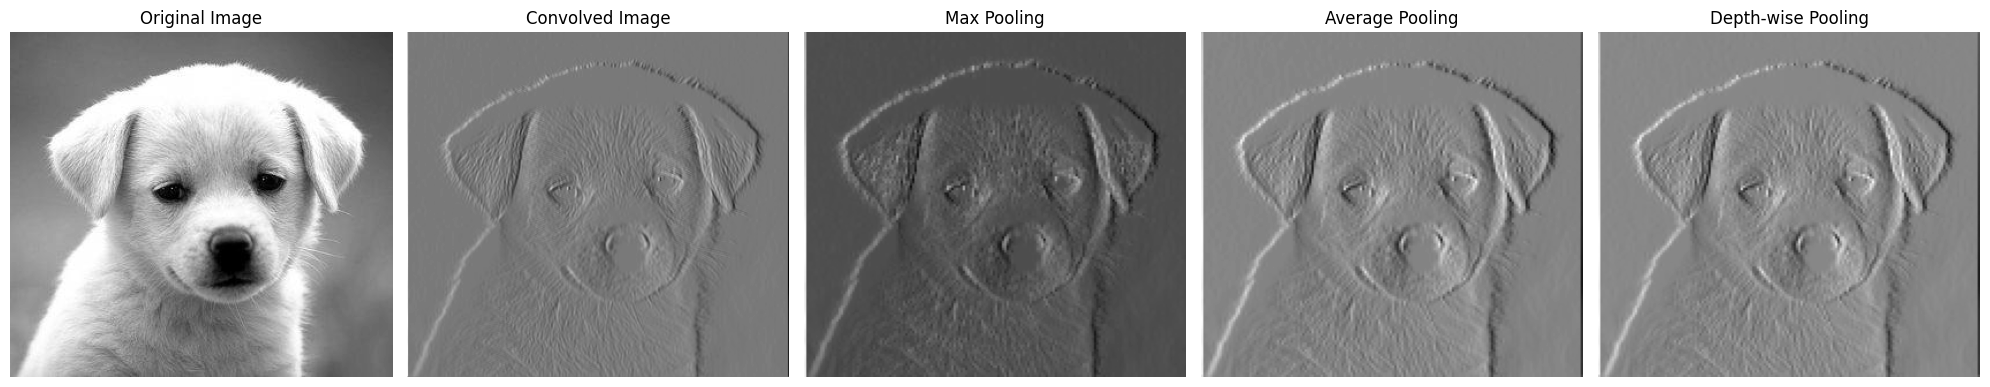

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data, color, img_as_float

# Load a sample image and convert it to grayscale
image = cv2.imread("dog.png", cv2.IMREAD_GRAYSCALE)

image = img_as_float(image)  # Normalize pixel values

# Define a convolution kernel (e.g., edge detection)
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Apply convolution
convolved_image = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

# Define pooling functions
def max_pooling(image, pool_size=2):
    h, w = image.shape
    pooled = image.reshape(h // pool_size, pool_size, w // pool_size, pool_size).max(axis=(1, 3))
    return pooled

def avg_pooling(image, pool_size=2):
    h, w = image.shape
    pooled = image.reshape(h // pool_size, pool_size, w // pool_size, pool_size).mean(axis=(1, 3))
    return pooled

def depthwise_pooling(image, pool_size=2):
    h, w = image.shape
    pooled = np.median(image.reshape(h // pool_size, pool_size, w // pool_size, pool_size), axis=(1, 3))
    return pooled

# Apply pooling methods
max_pooled = max_pooling(convolved_image)
avg_pooled = avg_pooling(convolved_image)
depthwise_pooled = depthwise_pooling(convolved_image)

# Plot results
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('Convolved Image')
axes[1].axis('off')

axes[2].imshow(max_pooled, cmap='gray')
axes[2].set_title('Max Pooling')
axes[2].axis('off')

axes[3].imshow(avg_pooled, cmap='gray')
axes[3].set_title('Average Pooling')
axes[3].axis('off')

axes[4].imshow(depthwise_pooled, cmap='gray')
axes[4].set_title('Depth-wise Pooling')
axes[4].axis('off')

plt.tight_layout()
plt.show()
